# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import os
import cv2

# Read images and made dataframe of paths and labels

In [2]:
input_path = []
label = []
import re

for class_name in os.listdir("E:/Data Science/Datasets/Fire-Detection/"):
    for path in os.listdir("E:/Data Science/Datasets/Fire-Detection/"+class_name):
        label.append(class_name)
        a = os.path.join("E:/Data Science/Datasets/Fire-Detection/",str(class_name)+"/",path)
        input_path.append(a)

In [3]:
A = pd.DataFrame([input_path,label]).T

In [4]:
A.columns = ["input_path","label"]

In [5]:
A.head()

input_path label
0    E:/Data Science/Datasets/Fire-Detection/0/1.jpg     0
1   E:/Data Science/Datasets/Fire-Detection/0/10.jpg     0
2  E:/Data Science/Datasets/Fire-Detection/0/100.jpg     0
3  E:/Data Science/Datasets/Fire-Detection/0/101.jpg     0
4  E:/Data Science/Datasets/Fire-Detection/0/102.jpg     0

<AxesSubplot:xlabel='label', ylabel='count'>

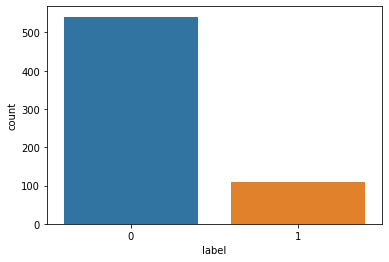

In [6]:
import seaborn as sb
sb.countplot(A["label"])

# Resize

In [7]:
data = []
for i in A["input_path"]:
    img_arr = cv2.imread(str(i))
    img_arr = cv2.resize(img_arr,(100,100))
    data.append(img_arr)

In [8]:
data[4].shape

(100, 100, 3)

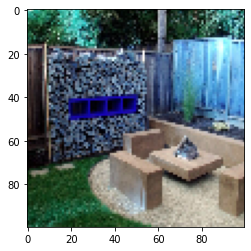

In [9]:
plt.imshow(data[116],cmap=plt.cm.binary)

In [10]:
type(data[23])

numpy.ndarray

In [11]:
data[23].shape

(100, 100, 3)

# Declare variable X and Y

In [12]:
X = np.array(data)

In [13]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(label)

# Divide X and Y into training and testing

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=21,test_size=0.2)

In [15]:
xtrain.shape

(520, 100, 100, 3)

In [16]:
xtest.shape

(131, 100, 100, 3)

# Create CNN

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [18]:
nn = Sequential()

nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(100,100,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.3))

nn.add(Flatten())
nn.add(Dense(units=128,activation="relu"))
nn.add(Dense(units=64,activation="relu"))
nn.add(Dense(units=2,activation="sigmoid"))

In [19]:
nn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
nn.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
9/9 [==============================] - 4s 483ms/step - loss: 0.8394 - accuracy: 0.7154 - val_loss: 2.6674 - val_accuracy: 0.8092
Epoch 2/50
9/9 [==============================] - 4s 450ms/step - loss: 0.3006 - accuracy: 0.8404 - val_loss: 2.7952 - val_accuracy: 0.8092
Epoch 3/50
9/9 [==============================] - 4s 443ms/step - loss: 0.2379 - accuracy: 0.8404 - val_loss: 1.3346 - val_accuracy: 0.8092
Epoch 4/50
9/9 [==============================] - 4s 447ms/step - loss: 0.2248 - accuracy: 0.8462 - val_loss: 0.9156 - val_accuracy: 0.8092
Epoch 5/50
9/9 [==============================] - 4s 445ms/step - loss: 0.1781 - accuracy: 0.8404 - val_loss: 1.2140 - val_accuracy: 0.8092
Epoch 6/50
9/9 [==============================] - 4s 443ms/step - loss: 0.1854 - accuracy: 0.8462 - val_loss: 0.7484 - val_accuracy: 0.8092
Epoch 7/50
9/9 [==============================] - 4s 453ms/step - loss: 0.1601 - accuracy: 0.8442 - val_loss: 1.0492 - val_accuracy: 0.8092
Epoch 8/50
9/9 [====

In [20]:
nn.evaluate(xtest,ytest,batch_size=64)

3/3 [==============================] - 0s 108ms/step - loss: 1.1326 - accuracy: 0.8855


[1.13258957862854, 0.885496199131012]

# Predicting Fire or Not Fire

In [21]:
from numpy import argmax
pred = nn.predict(xtest)

In [22]:
xtest.shape

(131, 100, 100, 3)

In [23]:
pred = argmax(pred,axis=1)

In [24]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [25]:
result = []
for i in pred:
    if i == 0:
        result.append("Not Fire")
    else:
        result.append("Fire")

--------------
Predicted result Not Fire
--------------


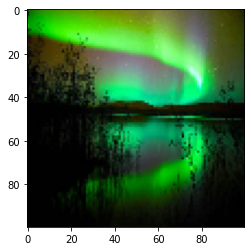

--------------
Predicted result Not Fire
--------------


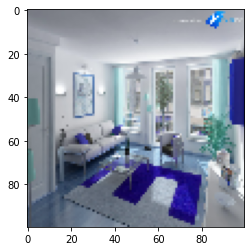

--------------
Predicted result Not Fire
--------------


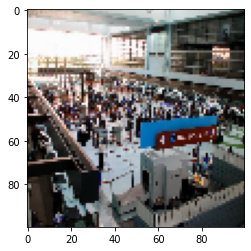

--------------
Predicted result Not Fire
--------------


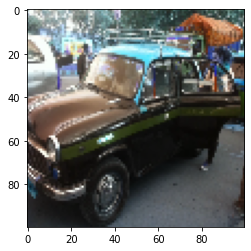

--------------
Predicted result Not Fire
--------------


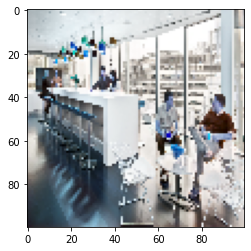

--------------
Predicted result Not Fire
--------------


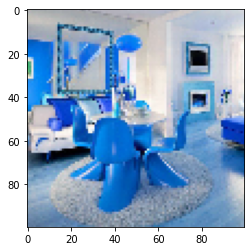

--------------
Predicted result Not Fire
--------------


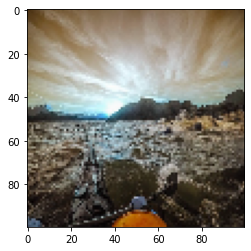

--------------
Predicted result Not Fire
--------------


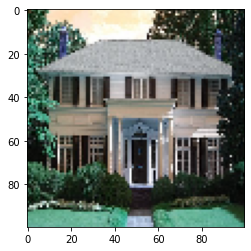

--------------
Predicted result Not Fire
--------------


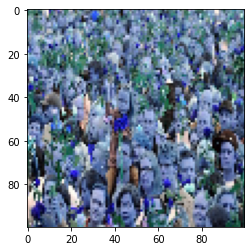

--------------
Predicted result Not Fire
--------------


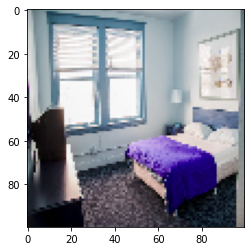

--------------
Predicted result Fire
--------------


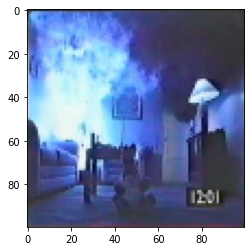

--------------
Predicted result Not Fire
--------------


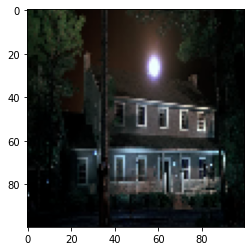

--------------
Predicted result Not Fire
--------------


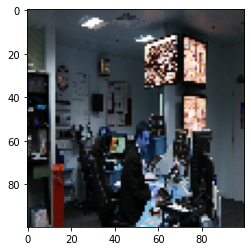

--------------
Predicted result Not Fire
--------------


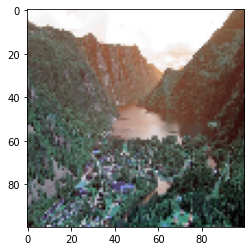

--------------
Predicted result Not Fire
--------------


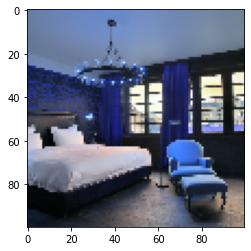

--------------
Predicted result Not Fire
--------------


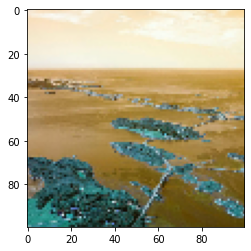

--------------
Predicted result Fire
--------------


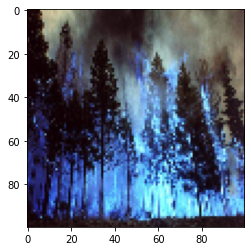

--------------
Predicted result Not Fire
--------------


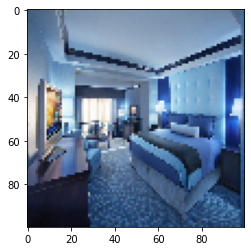

--------------
Predicted result Not Fire
--------------


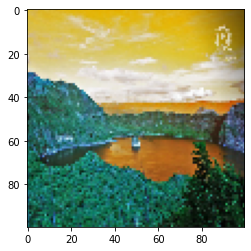

--------------
Predicted result Fire
--------------


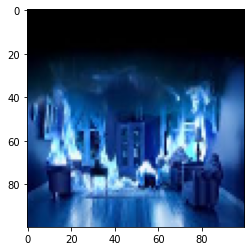

--------------
Predicted result Not Fire
--------------


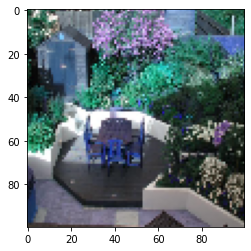

--------------
Predicted result Not Fire
--------------


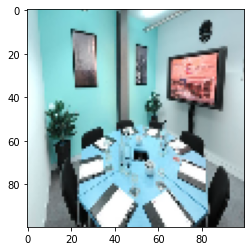

--------------
Predicted result Not Fire
--------------


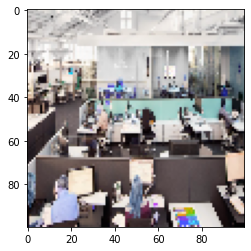

--------------
Predicted result Not Fire
--------------


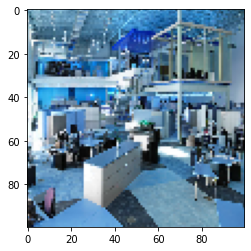

--------------
Predicted result Not Fire
--------------


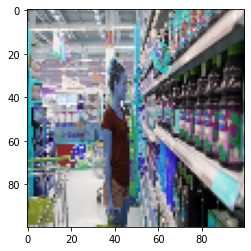

--------------
Predicted result Not Fire
--------------


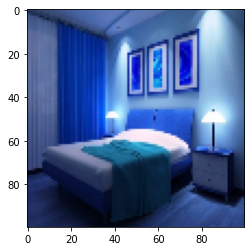

--------------
Predicted result Not Fire
--------------


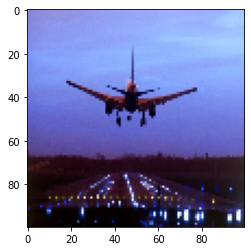

--------------
Predicted result Fire
--------------


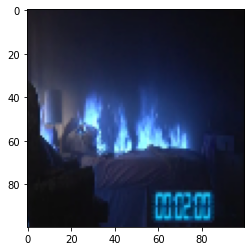

--------------
Predicted result Not Fire
--------------


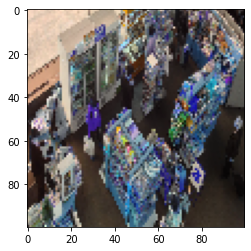

--------------
Predicted result Fire
--------------


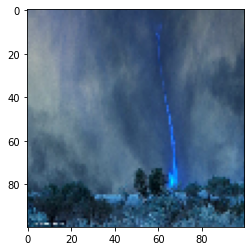

--------------
Predicted result Not Fire
--------------


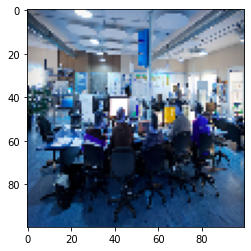

--------------
Predicted result Not Fire
--------------


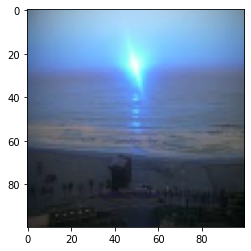

--------------
Predicted result Not Fire
--------------


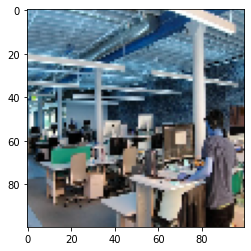

--------------
Predicted result Not Fire
--------------


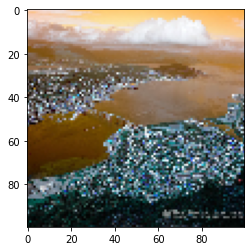

--------------
Predicted result Not Fire
--------------


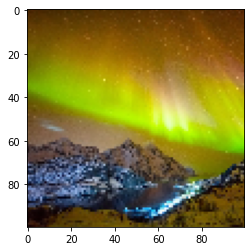

--------------
Predicted result Not Fire
--------------


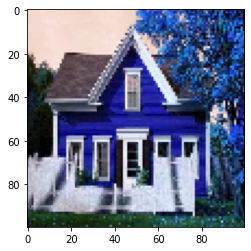

--------------
Predicted result Not Fire
--------------


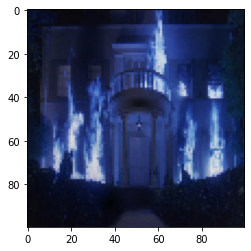

--------------
Predicted result Not Fire
--------------


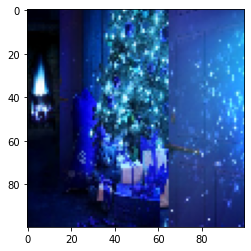

--------------
Predicted result Not Fire
--------------


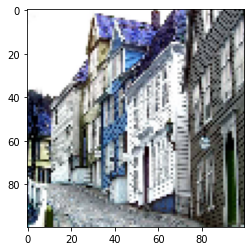

--------------
Predicted result Not Fire
--------------


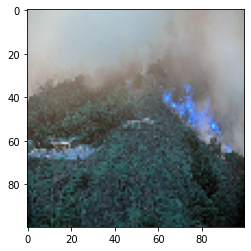

--------------
Predicted result Not Fire
--------------


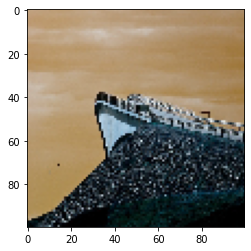

In [26]:
for i in range(0,41,1):
    print("--------------")
    print("Predicted result",result[i])
    print("--------------")
    plt.imshow(xtest[i],cmap=plt.cm.binary)
    plt.show()